## customer Demographic

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw=pd.read_excel('KPMG_VI_New_raw_data_update_final_II.xlsx',sheet_name='CustomerDemographic')

In [3]:
df_raw.shape

(4000, 13)

In [4]:
df_raw.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
df_raw.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [6]:
df_raw.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [7]:
df_raw['gender'].value_counts()

Female    2037
Male      1872
U           88
M            1
Femal        1
F            1
Name: gender, dtype: int64

In [8]:
df_raw['gender']=df_raw['gender'].replace('F',"Female")
df_raw['gender']=df_raw['gender'].replace('Femal',"Female")
df_raw['gender']=df_raw['gender'].replace('M',"Male")
df_raw['gender']=df_raw['gender'].replace('U',"Unknows")  

df_raw['gender'].value_counts()

Female     2039
Male       1873
Unknows      88
Name: gender, dtype: int64

In [9]:
df_raw['last_name'].value_counts()

Pristnor         3
Ramsdell         3
Smetoun          2
Van der Beken    2
Duke             2
                ..
Luck             1
Mowles           1
Crosfield        1
Durie            1
Amar             1
Name: last_name, Length: 3725, dtype: int64

In [10]:
df_raw['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [11]:
df_raw['last_name']=df_raw['last_name'].fillna(method='ffill')
df_raw['DOB']=df_raw['DOB'].fillna(method='ffill')

<AxesSubplot:>

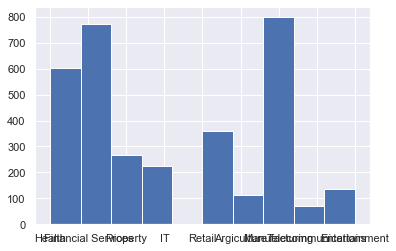

In [12]:
df_raw['job_industry_category'].hist()

In [13]:
df_raw['job_title']=df_raw['job_title'].fillna(method='bfill')
df_raw['job_industry_category']=df_raw['job_industry_category'].fillna(method='ffill')

<AxesSubplot:>

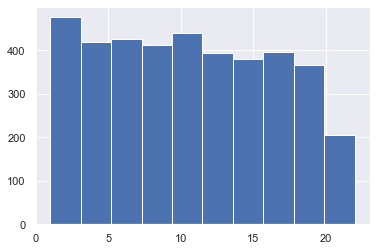

In [14]:
df_raw['tenure'].hist()

In [15]:
df_raw['tenure']=df_raw['tenure'].fillna(df_raw['tenure'].mean()).astype(int)
df_raw.drop(['default'],axis=1,inplace=True)

In [16]:
df_custDemographic=df_raw.copy()
df_custDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15
3,4,Talbot,Dearle,Male,33,1961-10-03,Senior Editor,IT,Mass Customer,N,No,7
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,IT,Affluent Customer,N,Yes,8


### Outliers

<AxesSubplot:xlabel='past_3_years_bike_related_purchases'>

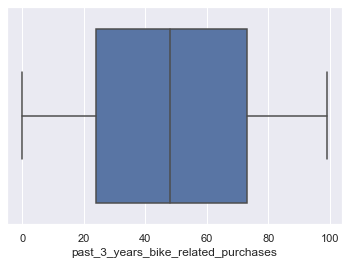

In [17]:
sns.boxplot(df_custDemographic['past_3_years_bike_related_purchases'])

<AxesSubplot:xlabel='tenure'>

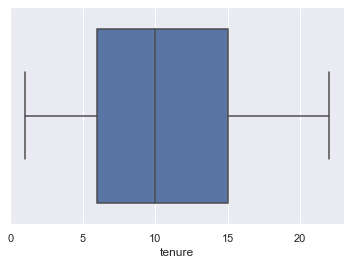

In [18]:
sns.boxplot(df_custDemographic['tenure'])

In [19]:
df_custDemographic['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

<AxesSubplot:xlabel='owns_car', ylabel='past_3_years_bike_related_purchases'>

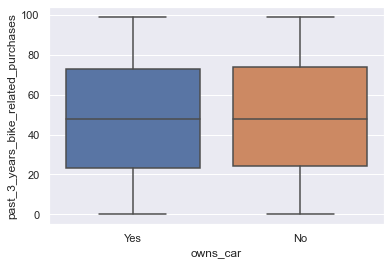

In [20]:
sns.boxplot(df_custDemographic['owns_car'],df_custDemographic['past_3_years_bike_related_purchases'])

<AxesSubplot:xlabel='owns_car', ylabel='tenure'>

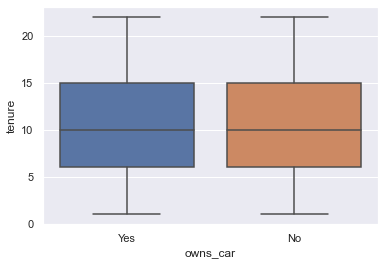

In [21]:
sns.boxplot(df_custDemographic['owns_car'],df_custDemographic['tenure'])

<AxesSubplot:xlabel='wealth_segment', ylabel='count'>

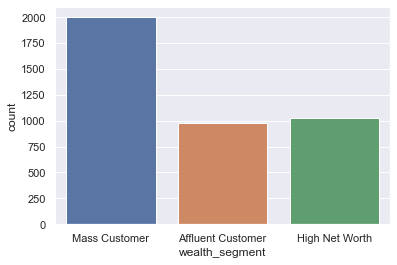

In [22]:
sns.countplot(df_custDemographic['wealth_segment'])

<AxesSubplot:xlabel='gender', ylabel='past_3_years_bike_related_purchases'>

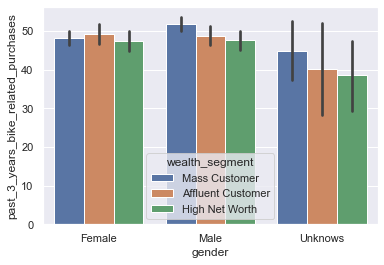

In [23]:
sns.barplot(x=df_custDemographic['gender'],
    y=df_custDemographic['past_3_years_bike_related_purchases'],hue=df_custDemographic['wealth_segment'])

<AxesSubplot:xlabel='gender'>

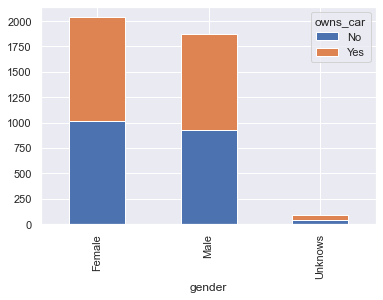

In [24]:
pd.crosstab(df_custDemographic['gender'],df_custDemographic['owns_car']).plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='gender'>

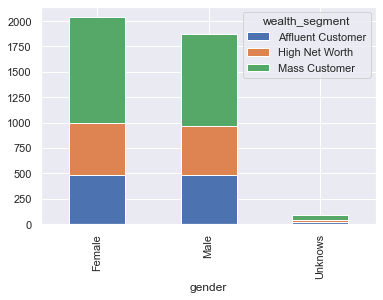

In [25]:
pd.crosstab(df_custDemographic['gender'],df_custDemographic['wealth_segment']).plot(kind='bar',stacked=True)

In [26]:
df_raw.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [27]:
df_raw.to_csv("CustomerDemographic_cleaned.csv", index=False)

## Trancations

In [28]:
import pandas as pd

In [29]:
df_1 = pd.read_excel("KPMG_VI_New_raw_data_update_final_II.xlsx", sheet_name="Transactions")

In [30]:
df_1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [31]:
df_1.shape

(20000, 13)

In [32]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [33]:
df_1['product_first_sold_date']=pd.to_datetime(df_1['product_first_sold_date']).dt.date

In [34]:
df_1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01


In [35]:
df_1.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


In [36]:
df_1.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [37]:
df_1['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [38]:
df_1['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [39]:
df_1.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [40]:
df_1['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [41]:
df_1['brand'].value_counts()


Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [42]:
df_1['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [43]:
df_1['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [44]:
df_1['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [45]:
df_1['brand']=df_1['brand'].map({'Solex':1, 'Giant Bicycles':2, 'WeareA2B':3,
                                                        'OHM Cycles':4, 'Trek Bicycles':5,'Norco Bicycles':6})

df_1['product_line']=df_1['product_line'].map({'Standard':1, 'Road':2, 'Touring':3, 'Mountain':4})

df_1['product_class']=df_1['product_class'].map({'medium':1, 'high':2, 'low':3})

df_1['product_size']=df_1['product_size'].map({'medium':1, 'high':2, 'low':3})


In [46]:
df_1.isnull().sum()

transaction_id                0
product_id                    0
customer_id                   0
transaction_date              0
online_order                360
order_status                  0
brand                       197
product_line                197
product_class               197
product_size               7010
list_price                    0
standard_cost               197
product_first_sold_date     197
dtype: int64

In [47]:
df_1['online_order'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
19995    1.0
19996    1.0
19997    1.0
19998    0.0
19999    1.0
Name: online_order, Length: 20000, dtype: float64>

In [48]:
df_1['online_order']=df_1['online_order'].fillna(method='ffill')

<AxesSubplot:xlabel='standard_cost'>

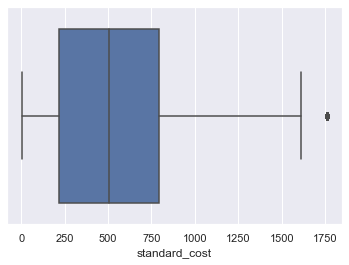

In [49]:
import seaborn as sns
sns.boxplot(df_1['standard_cost'])

In [50]:
df_1['brand']=df_1['brand'].fillna(df_1['brand'].mode()[0])

<AxesSubplot:xlabel='product_size', ylabel='Density'>

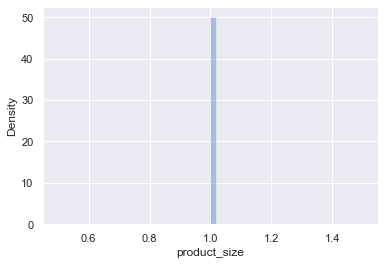

In [51]:
sns.distplot(df_1['product_size'])

<AxesSubplot:xlabel='product_line', ylabel='Density'>

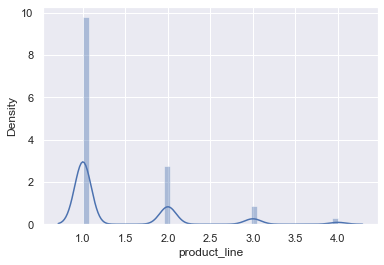

In [52]:
sns.distplot(df_1['product_line'])

<AxesSubplot:xlabel='product_class', ylabel='Density'>

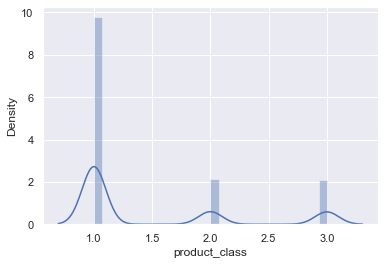

In [53]:
sns.distplot(df_1['product_class'])

In [54]:
df_1['product_line']=df_1['product_line'].fillna(df_1['product_line'].mode()[0])
df_1['product_class']=df_1['product_class'].fillna(df_1['product_class'].mode()[0])
df_1['product_size']=df_1['product_size'].fillna(df_1['product_size'].median())

<AxesSubplot:xlabel='standard_cost', ylabel='Density'>

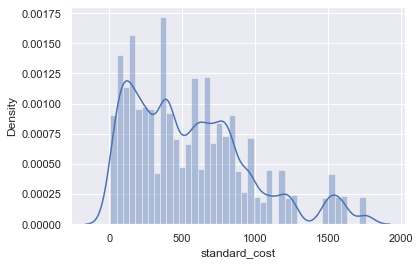

In [55]:
sns.distplot(df_1['standard_cost'])

<AxesSubplot:>

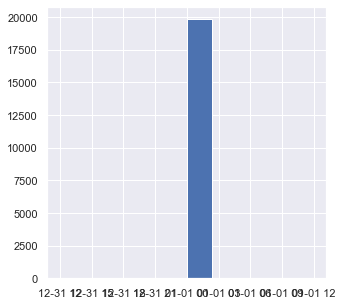

In [56]:
df_1['product_first_sold_date'].hist(figsize=(5,5))

In [57]:
df_1['product_first_sold_date'] = pd.to_datetime(df_1['product_first_sold_date'])

In [58]:
df_1['standard_cost']=df_1['standard_cost'].fillna(df_1['standard_cost'].median())

df_1['product_first_sold_date']=df_1['product_first_sold_date'].fillna(df_1['product_first_sold_date'].median())

In [59]:
df_1.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [60]:
df_1.to_csv("transactions_cleansed.csv", index=False)

## New Customer Dataset

In [5]:
df_2 = pd.read_excel("KPMG_VI_New_raw_data_update_final_II.xlsx", sheet_name="NewCustomerList")


In [6]:
df_2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.53,0.6625,0.828125,0.703906,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.08,1.0800,1.350000,1.147500,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.06,1.0600,1.060000,1.060000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.10,1.3750,1.375000,1.375000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.05,1.0500,1.312500,1.312500,4,4,1.703125


In [7]:
df_2.shape

(1000, 23)

In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [9]:
cols = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']

In [10]:
df_2 = df_2.drop(cols, axis=1)

In [11]:
df_2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [12]:
df_2.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [13]:
df_2.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [14]:
df_2.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [15]:
df_2['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [16]:
df_2['gender'] = df_2['gender'].replace('U', 'Unspecified')

In [17]:
df_2['gender'].value_counts()

Female         513
Male           470
Unspecified     17
Name: gender, dtype: int64

In [19]:
df_2['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

<AxesSubplot:>

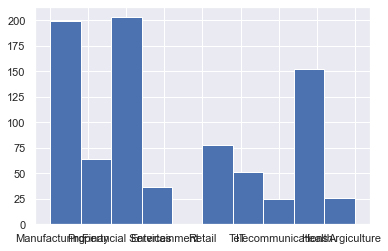

In [20]:
df_2['job_industry_category'].hist()

In [21]:
df_2['last_name'].value_counts()

Crellim          2
Van den Velde    2
Minshall         2
Sissel           2
Eade             2
                ..
Burgin           1
Grigolon         1
Leuty            1
Yetts            1
Swales           1
Name: last_name, Length: 961, dtype: int64

In [22]:
df_2['DOB'].value_counts()

1993-11-02    2
1994-04-15    2
1963-08-25    2
1995-08-13    2
1987-01-15    2
             ..
1958-05-14    1
1977-12-08    1
1993-12-19    1
1954-10-06    1
1995-10-19    1
Name: DOB, Length: 958, dtype: int64

In [23]:
df_2['job_title'].value_counts()

Associate Professor              15
Environmental Tech               14
Software Consultant              14
Chief Design Engineer            13
VP Sales                         12
                                 ..
Systems Administrator III         1
Safety Technician I               1
Accounting Assistant II           1
Developer II                      1
Human Resources Assistant III     1
Name: job_title, Length: 184, dtype: int64

In [24]:
df_2['last_name']=df_2['last_name'].fillna(method='bfill')
df_2['DOB']=df_2['DOB'].fillna(method='bfill')
df_2['job_title']=df_2['job_title'].fillna(method='bfill')
                              
df_2['job_industry_category']=df_2['job_industry_category'].replace(np.nan,'Financial Services')

In [26]:
df_2.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [27]:
df_2.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

In [28]:
df_2.to_csv("Newcustomerlist_cleansed.csv", index=False)

## Customer Address 

In [29]:
df_4 = pd.read_excel("KPMG_VI_New_raw_data_update_final_II.xlsx", sheet_name="CustomerAddress")

In [30]:
df_4.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [31]:
df_4.shape

(3999, 6)

In [32]:
df_4.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [33]:
df_4.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [34]:
df_4['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [35]:
df_4['state'] = df_4['state'].replace('New South Wales','NSW').replace('Victoria','VIC')

In [36]:
df_4['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [37]:
df_4.to_csv("customeraddress_cleansed.csv", index=False)
